In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import wandb
from wandb.keras import WandbCallback

In [ ]:
wandb.init(project="Mnist")

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

# normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
    
    # استخراج ویژگی
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (5, 5), activation="relu"),
    
    layers.Flatten(),
    
    # همون شبکه ساده قدیمی
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

In [5]:
config = wandb.config
config.learning_rate = 0.001

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [7]:
model_output = model.fit(X_train, Y_train, epochs=8, validation_data=(X_val, Y_val), callbacks=[WandbCallback()])

Epoch 1/8
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1710 - accuracy: 0.9472 - val_loss: 14.9999 - val_accuracy: 0.9717
Epoch 2/8
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 9.7515 - val_accuracy: 0.9830
Epoch 3/8
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 8.6378 - val_accuracy: 0.9865
Epoch 4/8
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 9.7422 - val_accuracy: 0.9861
Epoch 5/8
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 8.4823 - val_accuracy: 0.9896
Epoch 6/8
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 15.9898 - val_accuracy: 0.9826
Epoch 7/8
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 16.8269 - val_accura

In [8]:
model_loss, model_accuracy = model_output.history["loss"], model_output.history["accuracy"]

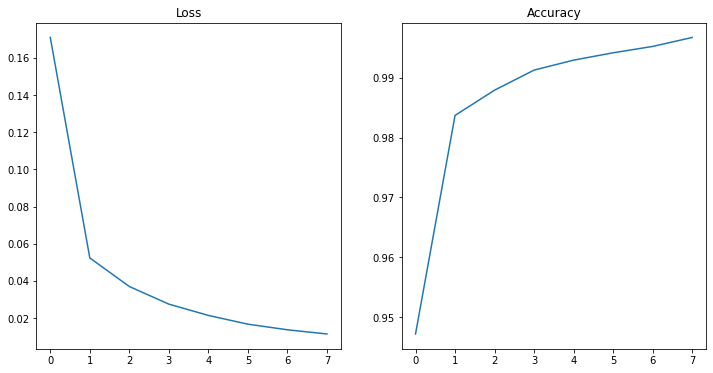

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_loss)
ax1.set_title("Loss")
ax2.plot(model_accuracy)
ax2.set_title("Accuracy")
plt.show()

In [10]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9923


[0.02847643755376339, 0.9922999739646912]

In [11]:
def predict(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray, (28, 28))
    img_gray = img_gray / 255.0
    img_gray = img_gray.reshape(1, 28, 28)

    result = model.predict([img_gray])
    return np.argmax(result)

In [13]:
predict("3.png")

3

In [14]:
predict("5.png")

5

In [15]:
predict("7.png")

7